# Salary Project

## Data analysis

In [1]:
import pandas as pd 
df=pd.read_csv('Salaries.csv')

In [2]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [4]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:>

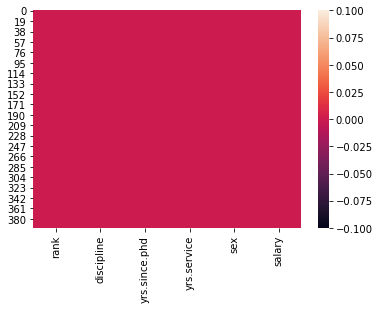

In [5]:
import seaborn as sns
sns.heatmap(df.isnull())

In [6]:
#the complete information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [7]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [8]:
for i in df.columns:
    print(df[i].value_counts())


Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64
B    216
A    181
Name: discipline, dtype: int64
4     19
28    16
8     14
20    13
19    13
13    12
17    12
12    12
38    11
23    11
21    11
39    10
10    10
11    10
31    10
30     9
22     9
15     9
14     9
9      9
25     9
33     8
35     8
37     8
29     8
27     8
18     8
16     8
3      8
40     7
26     6
24     6
32     6
7      6
6      6
5      6
45     6
2      5
43     5
36     5
49     4
46     4
1      4
42     4
41     4
34     3
56     2
44     1
47     1
48     1
51     1
52     1
54     1
Name: yrs.since.phd, dtype: int64
3     22
19    19
7     18
8     18
23    16
18    15
2     15
9     15
11    14
4     13
1     13
0     11
27    11
6     11
10    11
20    10
31    10
30     9
15     9
28     9
16     8
14     8
22     8
38     8
5      8
25     8
26     7
17     6
36     6
21     6
40     5
35     5
12     5
39     4
45     4
33     4
43     4
37     4
49     3
44     3
24  

# EDA

In [9]:
#import libraries required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'sex')

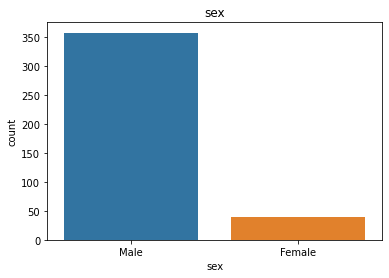

In [10]:
sns.countplot(df['sex'])
plt.title('sex')

Text(0.5, 1.0, 'discipline')

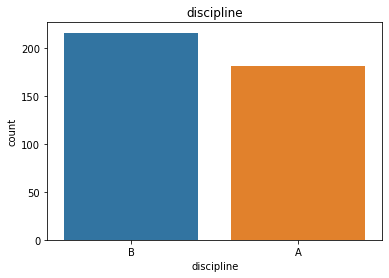

In [11]:
sns.countplot(df['discipline'])
plt.title('discipline')

Text(0.5, 1.0, 'rank')

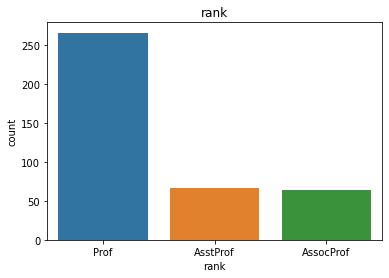

In [12]:
sns.countplot(df['rank'])
plt.title('rank')

Text(0.5, 1.0, 'yrs.since.phd')

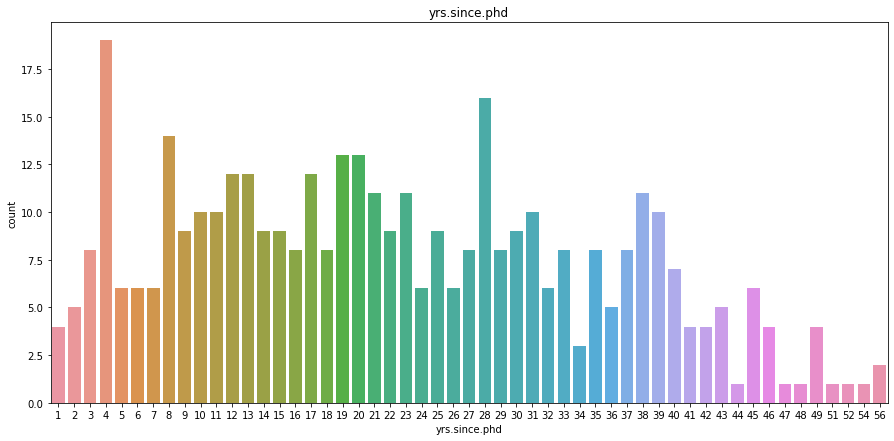

In [13]:
plt.figure(figsize=(15,7))
sns.countplot(df['yrs.since.phd'])
plt.title('yrs.since.phd')


Text(0.5, 1.0, 'yrs.service')

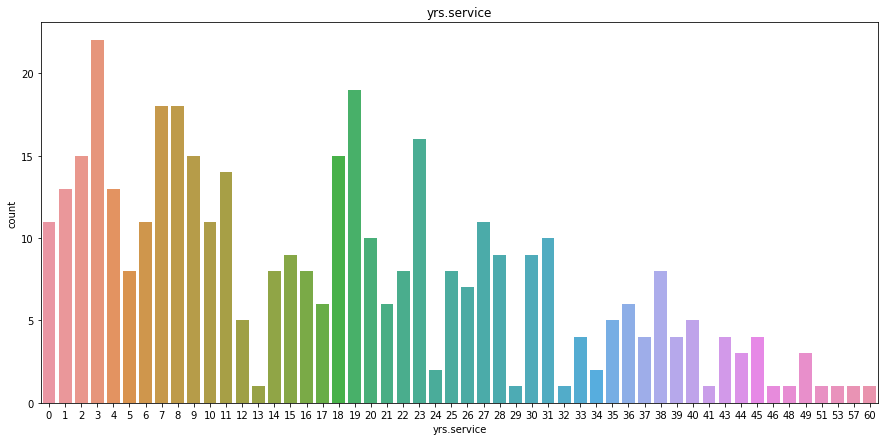

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(df['yrs.service'])
plt.title('yrs.service')


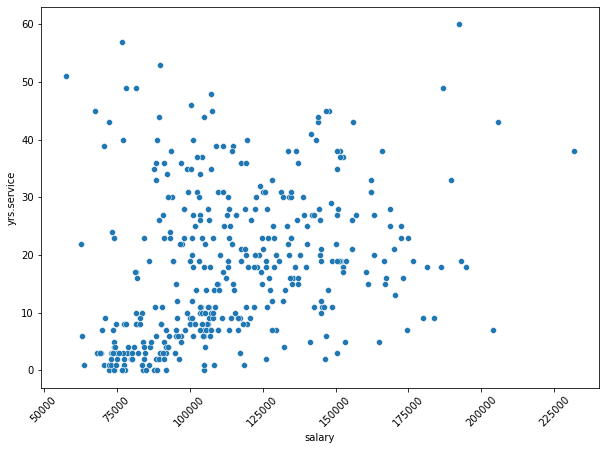

In [15]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='salary',y='yrs.service',data=df)
plt.xticks(rotation=45)
plt.show()

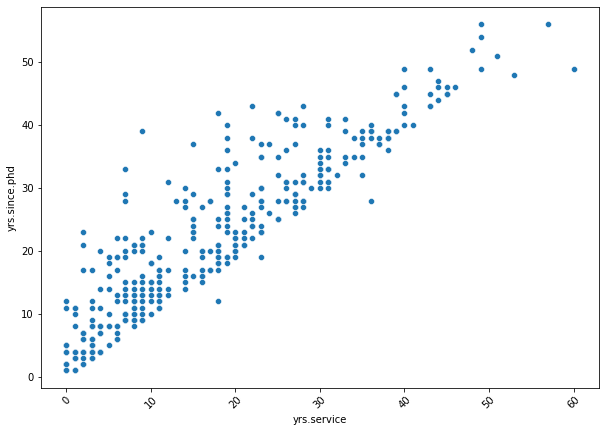

In [16]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='yrs.service',y='yrs.since.phd',data=df)
plt.xticks(rotation=45)
plt.show()


<AxesSubplot:xlabel='yrs.service', ylabel='salary'>

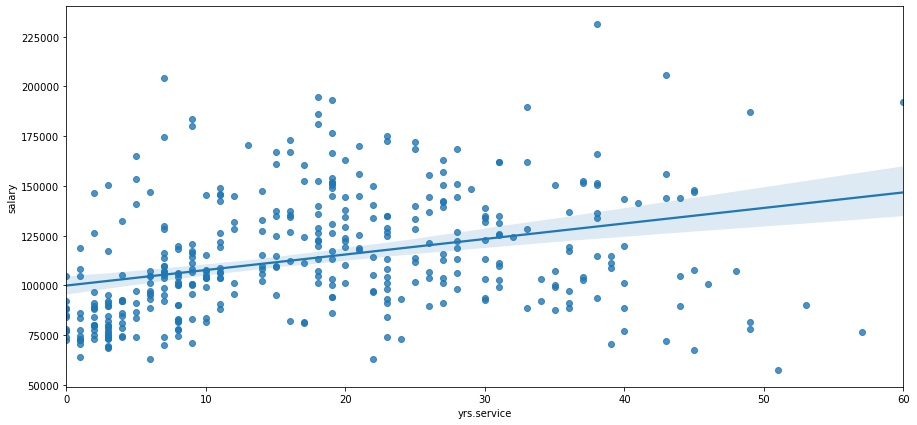

In [17]:
plt.figure(figsize=(15,7))

sns.regplot(data =df, x = 'yrs.service', y = 'salary', scatter = True)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='salary'>

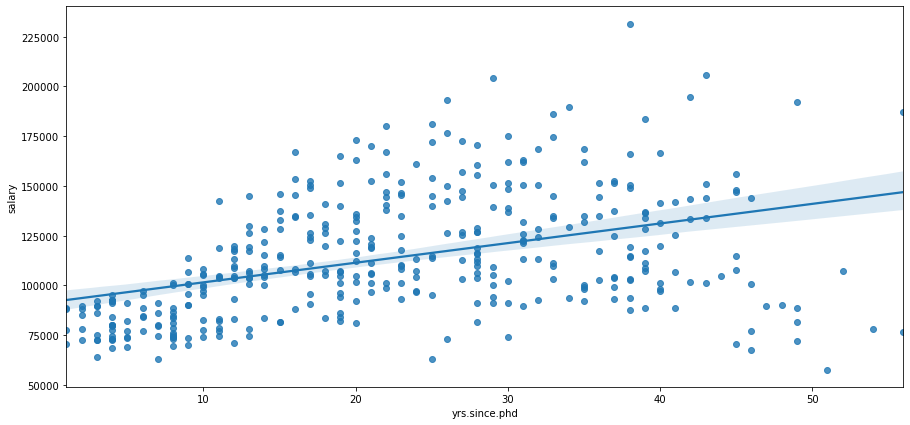

In [18]:
plt.figure(figsize=(15,7))

sns.regplot(data =df, x = 'yrs.since.phd', y = 'salary', scatter = True)

### label encoding  

In [19]:
#label encoding
df1=df
print(df1['rank'].unique())
print(df1['discipline'].unique())
print(df1['sex'].unique())

['Prof' 'AsstProf' 'AssocProf']
['B' 'A']
['Male' 'Female']


In [20]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df1['rank']= label_encoder.fit_transform(df['rank'])
df1['rank'].unique()
df1['discipline']= label_encoder.fit_transform(df['discipline'])
df1['discipline'].unique()
df1['sex']= label_encoder.fit_transform(df['sex'])
df1['sex'].unique()

array([1, 0])

In [21]:
from sklearn.preprocessing import MinMaxScaler
df1=df
# create data
data =df1
 
# scale features
scaler = MinMaxScaler()
model=scaler.fit(data)
scaled_data=model.transform(data)
 
# print scaled features
print(scaled_data)
 

[[1.         1.         0.32727273 0.3        1.         0.47166825]
 [1.         1.         0.34545455 0.26666667 1.         0.66419178]
 [0.5        1.         0.05454545 0.05       1.         0.12633457]
 ...
 [1.         0.         0.74545455 0.41666667 1.         0.25288785]
 [1.         0.         0.43636364 0.25       1.         0.21600046]
 [0.5        0.         0.12727273 0.06666667 1.         0.13373047]]


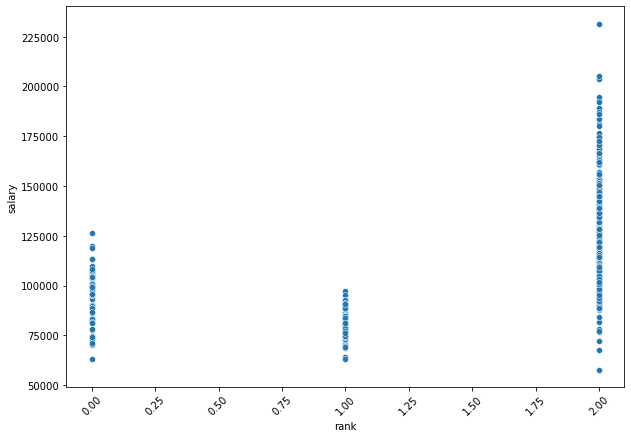

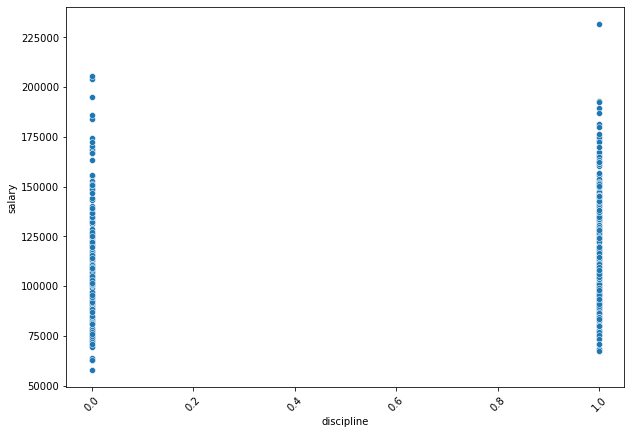

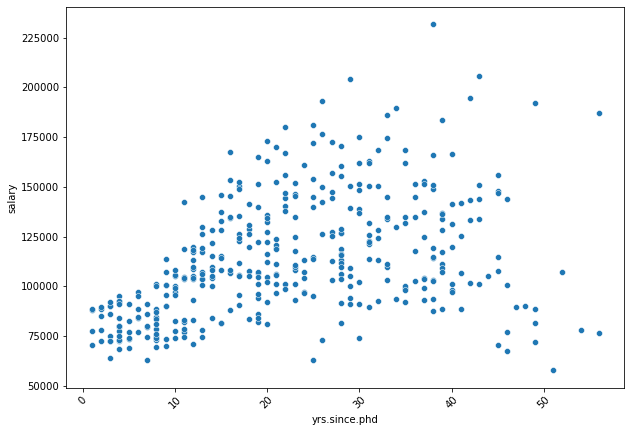

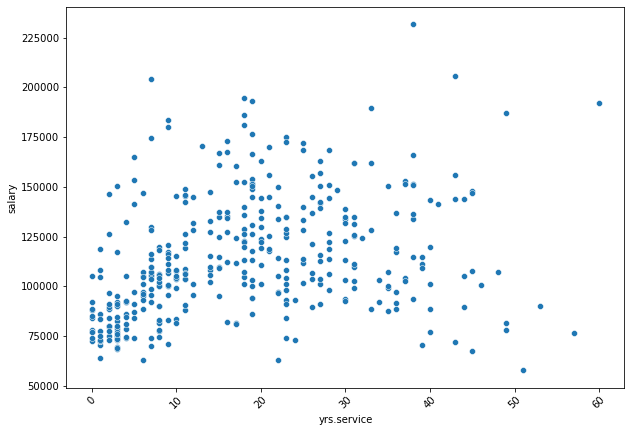

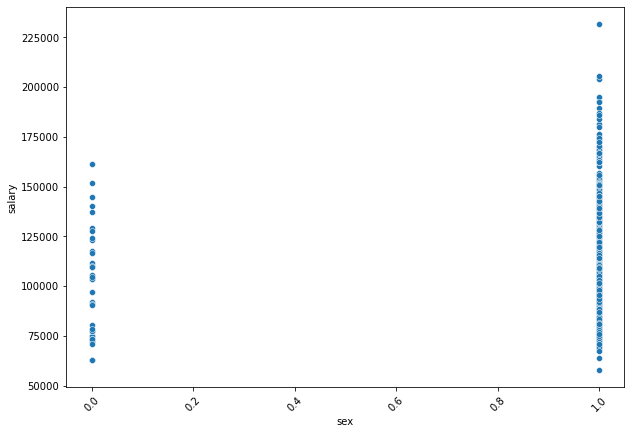

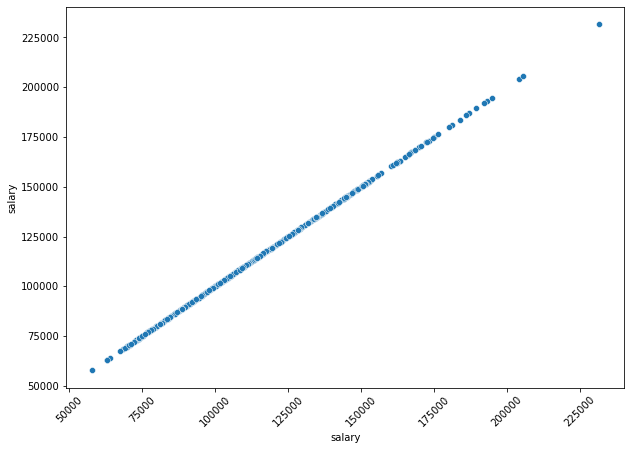

In [22]:
import matplotlib.pyplot as plt
for column in df.columns :
    
    plt.figure(figsize=(10,7))
    sns.scatterplot(x=df[column],y='salary',data=df)
    plt.xticks(rotation=45)
    plt.show()

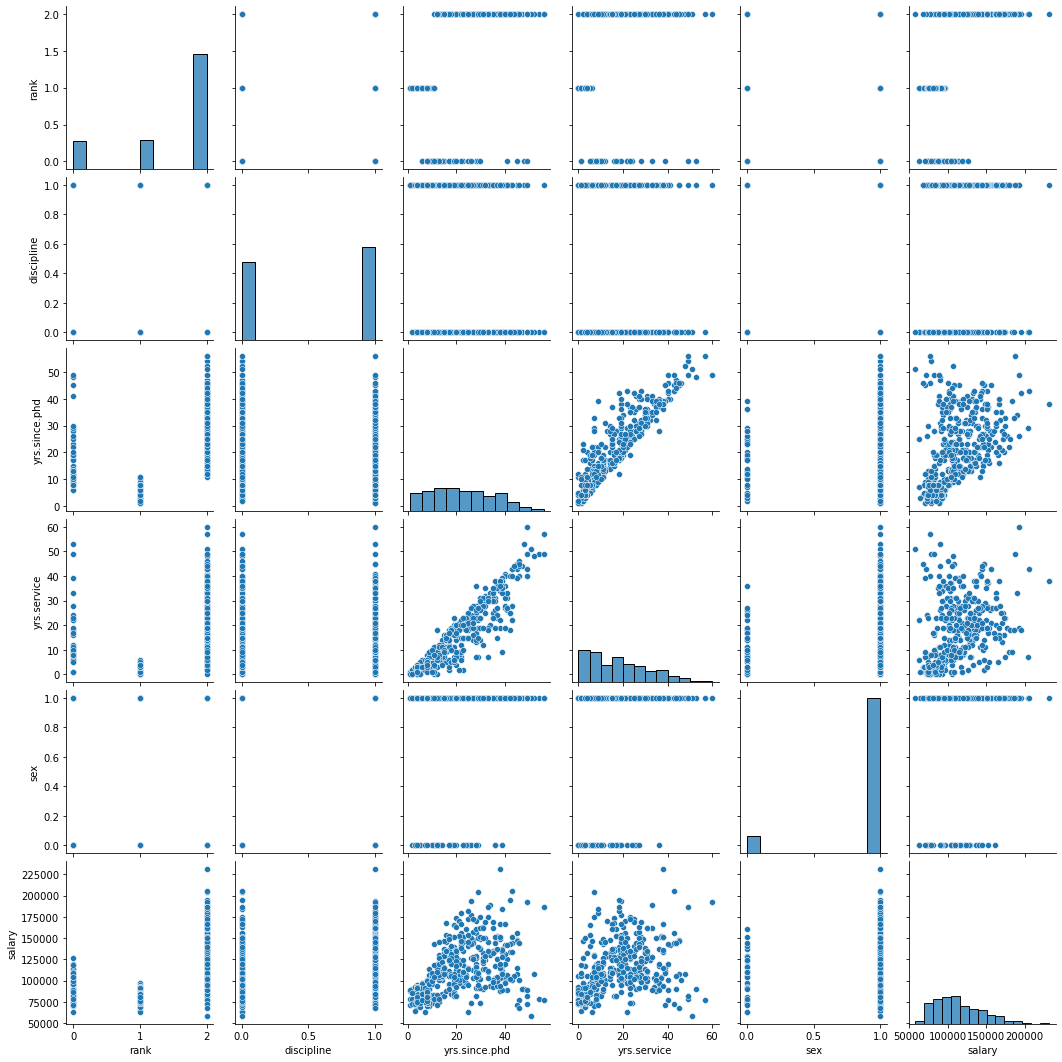

In [23]:
sns.pairplot(df)


# correlation

In [24]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

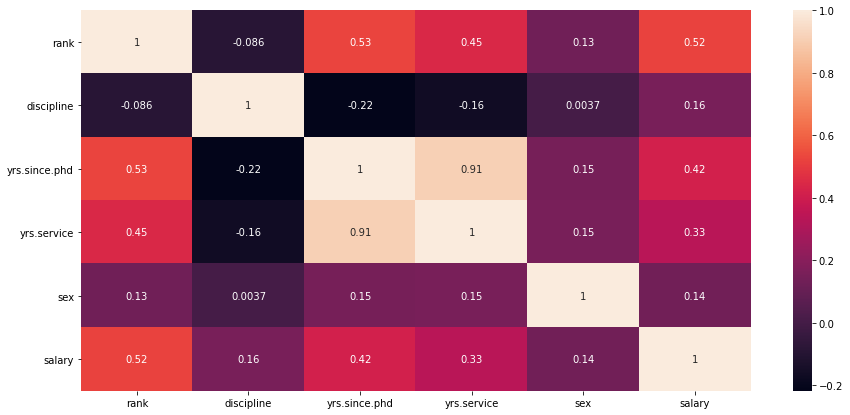

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

# Outcome of correlation

# Describing Datasets

In [26]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   rank           397 non-null    int32
 1   discipline     397 non-null    int32
 2   yrs.since.phd  397 non-null    int64
 3   yrs.service    397 non-null    int64
 4   sex            397 non-null    int32
 5   salary         397 non-null    int64
dtypes: int32(3), int64(3)
memory usage: 14.1 KB


# Outliers checking


<AxesSubplot:>

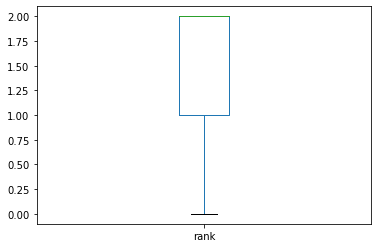

In [28]:
df1['rank'].plot.box()

<AxesSubplot:>

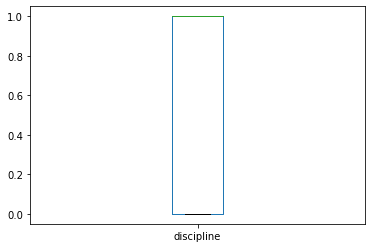

In [29]:
df1['discipline'].plot.box()

<AxesSubplot:>

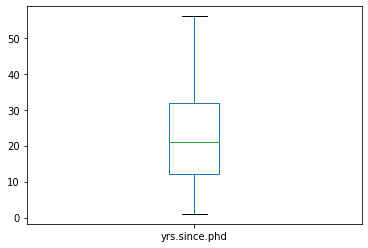

In [30]:
df1['yrs.since.phd'].plot.box()

<AxesSubplot:>

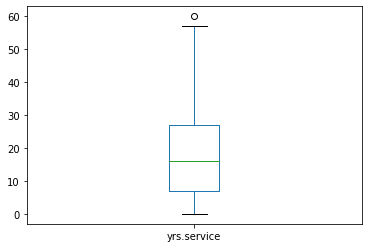

In [31]:
df1['yrs.service'].plot.box()

<AxesSubplot:>

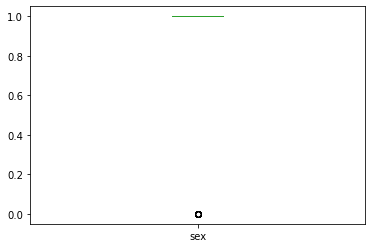

In [32]:
df1['sex'].plot.box()

<AxesSubplot:>

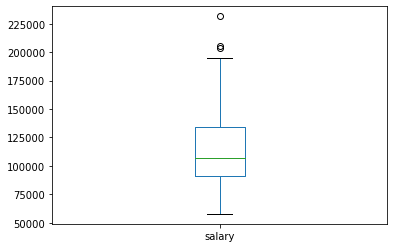

In [33]:
df1['salary'].plot.box()

# Skewness

In [34]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

# Normal Distribution Curve

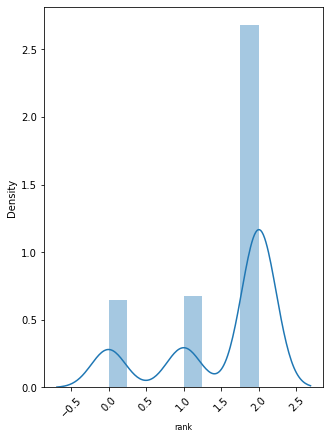

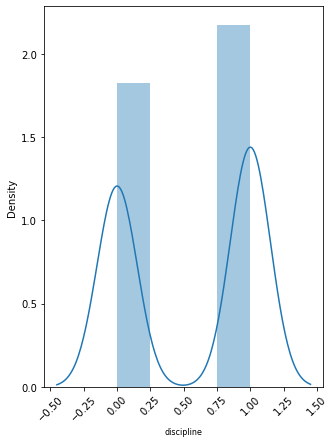

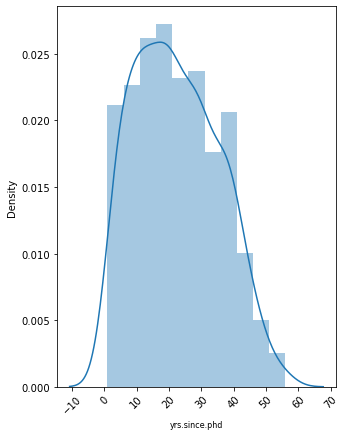

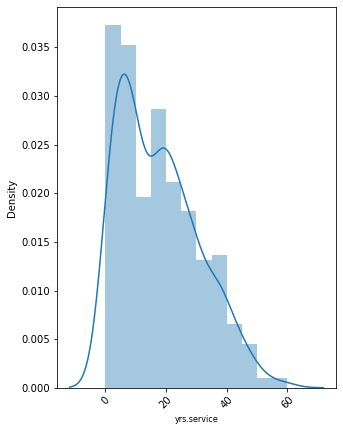

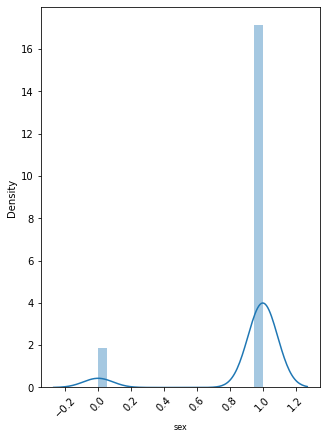

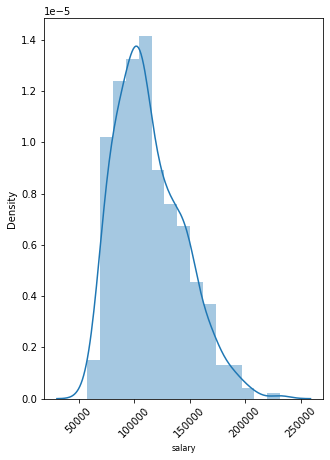

In [35]:
dfcolumns=df.columns
for column in dfcolumns:
    plt.figure(figsize=(5,7))
    sns.distplot(x=df[column])
    plt.xticks(rotation=45)
    plt.xlabel(column,fontsize=8)
    plt.show()

so Normal Distribution is show that some datas are skewed

# Data Cleaning

In [36]:
remove=pd.DataFrame(['sex','0.14','-2.74','high'],index=['column_name','corelation','skewness','outliers'])

In [37]:
remove

,0
column_name,sex
corelation,0.14
skewness,-2.74
outliers,high


In [38]:
#Delect the columns
df_new=df.drop(['sex'],axis=1)

In [39]:
df_new

,rank,discipline,yrs.since.phd,yrs.service,salary
0,2,1,19,18,139750
1,2,1,20,16,173200
2,1,1,4,3,79750
3,2,1,45,39,115000
4,2,1,40,41,141500
...,...,...,...,...,...
392,2,0,33,30,103106
393,2,0,31,19,150564
394,2,0,42,25,101738
395,2,0,25,15,95329


# Removing outliers

In [40]:
#import libray
from scipy.stats import zscore
import numpy as np

z=np.abs(zscore(df_new))
z.shape

(397, 5)

In [41]:
threshold=3
print(np.where(z>3))

(array([ 43, 131, 330, 364], dtype=int64), array([4, 3, 3, 4], dtype=int64))


In [42]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(397, 6)
(393, 6)


# percentage data loss

In [43]:
loss_percent=(397-393)/397*100
print(loss_percent)

1.0075566750629723


# Pre processing

In [44]:
#dividing data in feauture and vector
x=df_new.drop(['salary'],axis=1)
y=df_new['salary']


In [45]:
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1
...,...,...,...,...,...
392,2,0,33,30,1
393,2,0,31,19,1
394,2,0,42,25,1
395,2,0,25,15,1


Transforming data to remove skewness:


In [46]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [47]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

# Evaluation metrics

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [50]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(294, 5)
(294,)
(99, 5)
(99,)


In [51]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [52]:
print('model coeffient :',lm.coef_)
print('model intercept :',lm.intercept_)

model coeffient : [13707.40476152  7949.87540281  9958.20658326 -4806.64661332
  1585.24938275]
model intercept : 112827.47370061211


In [53]:
lm.score(x_train,y_train)

0.4489226658460762

In [54]:
#predict the value
pred=lm.predict(x_test)
print('predicted result score',pred)
print('actual score',y_test)

predicted result score [ 99411.83663302 117597.6443465  123772.73835095 129790.96551696
 118086.72354663 137665.10245103 139144.87911889 118705.20341579
 132961.63492065 120305.2084572  121622.13771963  95882.86820726
 121157.19447349 126584.83729105  82532.53689523 125018.28724282
 125874.38350027  84059.12389034 117974.7063548  137264.7681058
 129152.75004086 120017.43484696 130600.33727747 127726.35580896
 114496.94078883 111433.40867117  96446.00280773  96798.98575675
 131236.31818091 132596.78952051  94454.96815565 117217.83884881
 129026.6170015  120541.77056577  91385.5335466   89126.04598605
 113319.24847143  90323.55438308 132710.63034086 117512.40629134
 134307.29956311 130873.14768516 117329.75599731  94414.4002024
 125118.3457061  128613.07331344 125139.54423169 127294.23875006
 122121.56859066  95091.22560887  89288.56002235  89802.51358135
 135186.93494386  75871.23579727 119705.49019718 120713.06411492
 133475.58847965 132229.44295098 118720.8106844  100600.86543104
  99

Text(0, 0.5, 'Predicted Y')

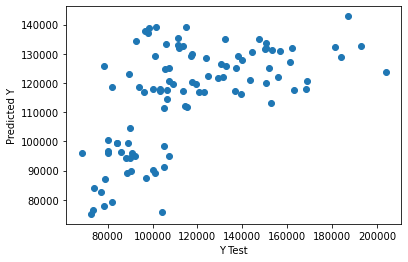

In [55]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [56]:
print('error')
#r2 score--> coefficent of determination
print('mean absolute error :',mean_absolute_error(y_test,pred))
print('mean squared error :',mean_squared_error(y_test,pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

error
mean absolute error : 19102.474349901622
mean squared error : 604510539.8157109
root mean squared error : 24586.79604616492


In [57]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.351150870091295


### Lasso-Rigid regression

In [58]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)

Lasso(alpha=0.001)

In [59]:
ls.score(x_train,y_train)

0.44892266584604323

In [60]:
ls.coef_

array([13707.40418041,  7949.87376223,  9958.19501906, -4806.63466205,
        1585.2484539 ])

In [61]:
ls.intercept_

112827.47341126628

In [62]:
print('mean absolute error :',mean_absolute_error(y_test,pred))
print('mean squared error :',mean_squared_error(y_test,pred))
print('root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error : 19102.474349901622
mean squared error : 604510539.8157109
root mean squared error : 24586.79604616492


In [63]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.351150870091295


In [64]:
rd=Ridge(alpha=0.001)
rd.fit(x_train,y_train)

Ridge(alpha=0.001)

In [65]:
rd.score(x_train,y_train)

0.44892266582469076

In [66]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.351150870091295


### GridSearchCV

In [67]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


In [68]:
dataset = datasets.load_diabetes()
X =x_train ; y =y_train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [69]:
GBR = GradientBoostingRegressor()

In [70]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [71]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [72]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.02, max_depth=4, subsample=0.9)

 The best score across ALL searched params:
 0.4617198110704112

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.9}


# Model construction

### LinearRegression

In [73]:
LR=LinearRegression()
LR.fit(X_train,y_train)
print(LR.score(X_train,y_train))
LR_predict=LR.predict(X_test)

0.46893253545323155


In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics

In [75]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,LR_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,LR_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,LR_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,LR_predict))
print('r2_score:',r2_score(y_test,LR_predict))

Mean Absolute Error:  17938.739787044608
Mean Squared Error:  495899926.0438743
Root Mean Squared Error:  22268.810611343262
Explained Variance Score:  0.39476558890146607
r2_score: 0.39137432040887665


### RandomForestRegressor

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [77]:
predictions1=rf.predict(X_test)

In [78]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions1))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions1))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions1)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions1))
print('r2_score:',r2_score(y_test,predictions1))

Mean Absolute Error:  18421.177326912784
Mean Squared Error:  610132673.2534603
Root Mean Squared Error:  24700.86381593689
Explained Variance Score:  0.2511749602381852
r2_score: 0.2511746959470571


### SVR

In [79]:
from sklearn.svm import SVR

svr=SVR()
svr.fit(X_train,y_train)
print(svr.score(X_train,y_train))
svr_predict=svr.predict(X_test)

-0.015876353936156606


In [80]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,svr_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,svr_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,svr_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,svr_predict))
print('r2_score:',r2_score(y_test,svr_predict))

Mean Absolute Error:  23033.612509784063
Mean Squared Error:  835421022.4606279
Root Mean Squared Error:  28903.650677044723
Explained Variance Score:  0.0008691480793886486
r2_score: -0.025325193323028072


### DecisionTreeRegressor

In [81]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
print(DTR.score(X_train,y_train))
DTR_PRED=DTR.predict(X_test)

0.964900039966433


In [82]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_PRED))
print('r2_score:',r2_score(y_test,DTR_PRED))

Mean Absolute Error:  21875.404494382023
Mean Squared Error:  892852994.235955
Root Mean Squared Error:  29880.64581356894
Explained Variance Score:  -0.09350399440975155
r2_score: -0.09581234408925776


### GradientBoostingRegressor

In [83]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
print(GBR.score(X_train,y_train))
GBR_PRED=GBR.predict(X_test)

0.8245461306392015


In [84]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))

Mean Absolute Error:  16898.589705841237
Mean Squared Error:  532539953.1160754
Root Mean Squared Error:  23076.827189110627
Explained Variance Score:  0.346798687538425
r2_score: 0.3464054462350932


### Ridge

In [85]:
from sklearn.linear_model import Ridge

R=Ridge()
R.fit(X_train,y_train)
print(R.score(X_train,y_train))
R_predict=R.predict(X_test)

0.468852051549122


In [86]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,R_predict))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,R_predict))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,R_predict)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,R_predict))
print('r2_score:',r2_score(y_test,R_predict))

Mean Absolute Error:  17853.5978363306
Mean Squared Error:  493699194.12294734
Root Mean Squared Error:  22219.342792327305
Explained Variance Score:  0.3974086930266666
r2_score: 0.3940753128684996


# After evaluating the model based on MAE,MSE,RMSE,EVS,R2 SCORE the 2 best models choosen for hyper parameter tuning are


# Hyper Parameter Tuning


### GradientBoostingRegressor

In [87]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.model_selection import GridSearchCV
parameter = {"loss":['ls', 'lad', 'huber', 'quantile'],
             "criterion":['friedman_mse', 'mse', 'mae']}
GBR = GridSearchCV(GradientBoostingRegressor(),parameter,cv=5)

In [88]:
GBR.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'loss': ['ls', 'lad', 'huber', 'quantile']})

In [89]:
GBR.best_params_

{'criterion': 'mae', 'loss': 'lad'}

In [90]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor(criterion='mse',loss='ls')
GBR.fit(X_train,y_train)
GBR_final=GBR.predict(X_test)

In [91]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_final))
print('r2_score:',r2_score(y_test,GBR_final))

Mean Absolute Error:  16865.697841810932
Mean Squared Error:  530189525.3086825
Root Mean Squared Error:  23025.844725192655
Explained Variance Score:  0.3497837286526607
r2_score: 0.3492901627806605


### DecisionTreeRegressor

In [92]:
from sklearn.model_selection import GridSearchCV
parameter = {"max_depth":[1,3,5,7,9,11,12],
             'criterion':['mse','friedman_mse']}
GCV = GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)


In [93]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 12]})

In [94]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 5}

In [95]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor(criterion='mse',max_depth=9)
DTR.fit(X_train,y_train)
DTR_final=DTR.predict(X_test)

In [96]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,DTR_final))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,DTR_final))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,DTR_final)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,DTR_final))
print('r2_score:',r2_score(y_test,DTR_final))

Mean Absolute Error:  20968.26872659176
Mean Squared Error:  821407088.5333052
Root Mean Squared Error:  28660.2004273052
Explained Variance Score:  -0.00660786546013048
r2_score: -0.008125674604996913


### THE BEST MODEL AFTER HYPER PARAMETER TUNING IS GradientBoostingRegressor

### Final method

In [97]:
print("FINAL MODEL")
print("-----------------------------------------")
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,GBR_PRED))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,GBR_PRED))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,GBR_PRED)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,GBR_PRED))
print('r2_score:',r2_score(y_test,GBR_PRED))

FINAL MODEL
-----------------------------------------
Mean Absolute Error:  16898.589705841237
Mean Squared Error:  532539953.1160754
Root Mean Squared Error:  23076.827189110627
Explained Variance Score:  0.346798687538425
r2_score: 0.3464054462350932


<AxesSubplot:xlabel='salary', ylabel='Density'>

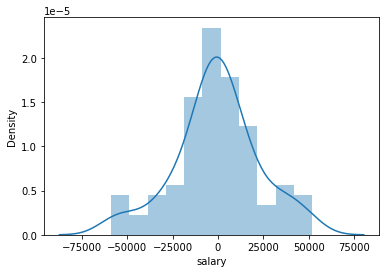

In [98]:
sns.distplot(GBR_PRED-y_test)

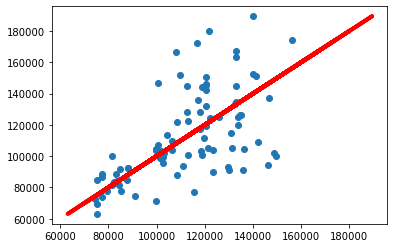

In [99]:
plt.scatter(GBR_PRED,y_test)
plt.plot(y_test,y_test,linewidth=4,color='Red')

# SAVING THE MODEL

In [100]:
import joblib
joblib.dump(rf,"final model.pkl")
['final model.pkl']

['final model.pkl']